0     blockchain new approach creat distribut networ...
1     literatur illustr blockchain technolog bt offe...
2     blockchain technolog disrupt technolog chang b...
3     effect hospit wast manag hwm becom signific en...
4     iot ecosystem allow commun billion devic world...
                            ...                        
88    digit transform collect action taken organ cou...
89    sinc advent blockchain technolog bt extens res...
90    globalis manufactur product environ compani in...
91    last decad variou crypto-curr open new door de...
92    blockchain disrupt bank industri contribut inc...
Name: joinedAbstractPreprocessed, Length: 93, dtype: object
***********************************************
{'blockchain': 239, 'propos': 142, 'technolog': 129, 'secur': 127, 'data': 125, 'use': 124, 'system': 118, 'network': 100, 'smart': 94, 'paper': 66, 'provid': 57, 'contract': 57, 'model': 56, 'iot': 56, 'applic': 54, 'result': 54, 'base': 53, 'transact': 49, 'challeng': 48, '

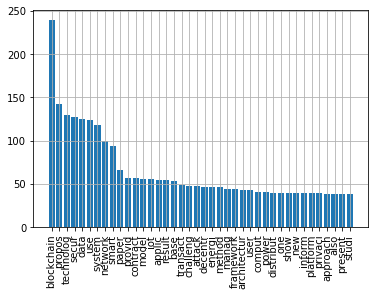

In [32]:
import nltk
import re
import pandas
# nltk.download('punkt')
# nltk.download('wordnet')
from nltk.tokenize import word_tokenize
import pandas as pd
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
import string
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import numpy as np
import matplotlib.pylab as plt
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()





    
    
Total = pd.read_excel('D:/Backup-05-22-2022/Desktop/excel/Total.xlsx')
abstractPreprocessed=[]

for abstract in Total['abstracts']:
  
    stopwordsRemove=[]
    punctuationRemove=[]
    stemmed_words=[]
    lemmetized_words=[]
    absPrepJoin=[]
    
    
    abstractLower=abstract.lower()
    numberRemove=re.sub(r'\d+', '', abstractLower)
    wordTokenize=word_tokenize(numberRemove)  
    
    for w in wordTokenize:
        if w not in stop_words:
            stopwordsRemove.append(w)
            
    for character in stopwordsRemove:
        if character not in string.punctuation:
            punctuationRemove.append(character)
    

    for token in punctuationRemove:
        stemmed_words.append(stemmer.stem(token))
   
    for token in stemmed_words:
        lemmetized_words.append(lemmatizer.lemmatize(token))
    
    abstractPreprocessed.append(lemmetized_words)
# print(abstractPreprocessed,'\n')
# print(abstractPreprocessed[1])


joinedAbstractPreprocessed=[]
joined=[]
for i in range(93):
    joined=' '.join(abstractPreprocessed[i])
    joinedAbstractPreprocessed.append(joined)
#     print('abstract',i,':','\n',joinedAbstractPreprocessed,'\n')
data={'joinedAbstractPreprocessed':joinedAbstractPreprocessed}
df= pandas.DataFrame(data)
print(df['joinedAbstractPreprocessed'])
print('***********************************************')

wordfreq = {}
for abs in  abstractPreprocessed:
    for token in abs:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1
# import heapq
# most_freq = heapq.nlargest(200, wordfreq, key=wordfreq.get)           
# print(most_freq)
# print('***********************************************')
# print(wordfreq)
# print('***********************************************')







sorted_dict = {}
sorted_keys = sorted(wordfreq, key=wordfreq.get,reverse=True)  

for w in sorted_keys:
    sorted_dict[w] = wordfreq[w]
# print(sorted_dict)
# print('***********************************************')
nMostFrequent={}
for key in sorted_dict:
    if sorted_dict[key]>35:
        nMostFrequent[key]=sorted_dict[key]
print(nMostFrequent)


keys = nMostFrequent.keys()
values = nMostFrequent.values()
plt.xticks(rotation='vertical')
# plt.xticks(fontsize=9)
plt.grid()
plt.bar(keys, values)

print('***********************************************')
print('len(wordfreq)=',len(wordfreq))
print('len(abstractPreprocessed)=',len(abstractPreprocessed))
print('len(abstractPreprocessed[0]=',len(abstractPreprocessed[0]))
print('len(abstractPreprocessed[1]=',len(abstractPreprocessed[1]))
print('len(abstractPreprocessed[2]=',len(abstractPreprocessed[2]))
print('***********************************************')


# import scipy.cluster.hierarchy as shc
# from sklearn.cluster import AgglomerativeClustering
# cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

# for i in range(93):
#     absVec[i]= []
#     for token in sorted_dict:
#         if token in abstractPreprocessed[i]:
#             occurrences=abstractPreprocessed[i].count(token)
#             normOccur=occurrences/len(abstractPreprocessed[i])
#             absVec[i].append(normOccur)
#         else:
#             absVec[i].append(0)
 
#     print(absVec[i])
